## Importer les bibliothèques:

In [6]:
#Réalisé Par : 
#Ismail Iaich , Brahim Anougmar , Wissal Hattab

import networkx as nx
import matplotlib.pyplot as plt
import math

## Définir Un Graphe :

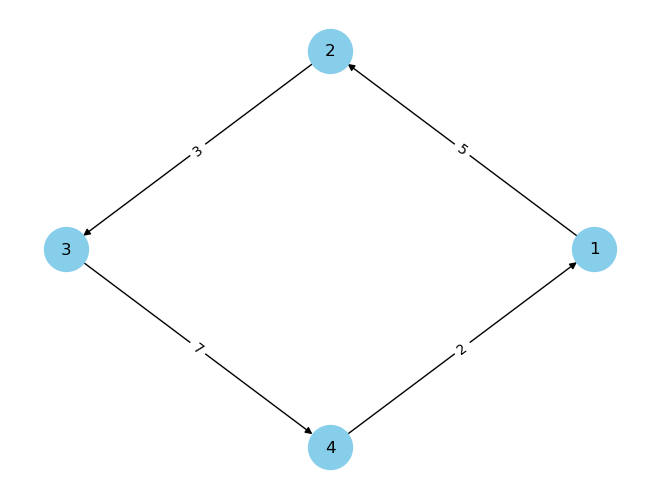

In [1]:
# Création d'un graphe orienté et pondéré
G = nx.DiGraph()

# Ajout de nœuds
G.add_nodes_from([1, 2, 3, 4])

# Ajout d'arêtes avec des poids
G.add_weighted_edges_from([(1, 2, 5), (2, 3, 3), (3, 4, 7), (4, 1, 2)])

# Dessin du graphe avec les poids des arêtes
pos = nx.circular_layout(G)  # Positionnement des nœuds
labels = nx.get_edge_attributes(G, 'weight')  # Récupération des poids des arêtes
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue")  # Dessin des nœuds
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)  # Dessin des poids des arêtes
plt.show()


## Algorithme de dijkstra :

### Pseudo-Code :

Algorithme Dijkstra(Graphe, s)

    # Début
    p(s) ← 0

    # Initialisation
    Sconnu ← {s}
    Sinconnu ← Sommets(Graphe) - Sconnu

    # Pour chaque sommet u non encore exploré
    Pour chaque u ∈ Sinconnu faire:
        p(u) ← ∞
        précédent(u) ← None

    # Pour chaque sommet u adjacent à s
    Pour chaque u ∈ Successeurs(s) faire:
        p(u) ← poids(s, u)
        précédent(u) ← s

    # Tant qu'il y a des sommets non explorés
    Tant que ∃ u ∈ Sinconnu tel que p(u) ≠ ∞ faire:
        choisir u ∈ Sinconnu tel que p(u) soit minimal
        Pour chaque v ∈ Successeurs(u) ∩ Sinconnu faire:
            Si p(u) + poids(u, v) < p(v) alors:
                p(v) ← p(u) + poids(u, v)
                précédent(v) ← u
            FinSi
        FinPour
        Sconnu ← Sconnu ∪ {u}
        Sinconnu ← Sinconnu - {u}
    FinTantQue
Fin

### Définir la fonction de Dijkstra:

In [7]:
def dijkstra(graphe, depart):
    # Initialisation des distances
    distances = {sommet: math.inf for sommet in graphe.nodes()}
    distances[depart] = 0
    
    # Initialisation des chemins
    chemins_plus_courts = {sommet: [depart] for sommet in graphe.nodes()}
    
    # Initialisation de l'ensemble P et de l'ensemble Q
    P = {depart}
    Q = set(graphe.nodes()) - P
    
    while Q:
        # Étape 1 : Mettre à jour les distances des voisins de P
        for sommet in P:
            for voisin in graphe.neighbors(sommet):
                distance_voisin = distances[sommet] + graphe[sommet][voisin]['weight']
                if distance_voisin < distances[voisin]:
                    distances[voisin] = distance_voisin
                    chemins_plus_courts[voisin] = chemins_plus_courts[sommet] + [voisin]
        
        # Recherche du prochain nœud à ajouter à P
        min_distance = math.inf
        prochain_sommet = None
        for sommet in Q:
            if distances[sommet] < min_distance:
                min_distance = distances[sommet]
                prochain_sommet = sommet
        
        # Ajouter le prochain nœud à P et le retirer de Q
        P.add(prochain_sommet)
        Q.remove(prochain_sommet)
    
    return distances, chemins_plus_courts



### Tester la fonction :

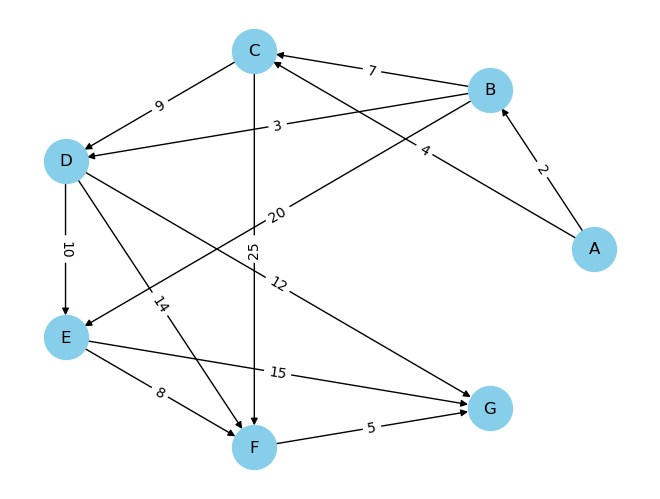

In [8]:

# Création du graphe pondéré orienté
G = nx.DiGraph()

# Ajout des arêtes avec les poids spécifiés
G.add_weighted_edges_from([
    ('A', 'B', 2), ('A', 'C', 4),
    ('B', 'C', 7), ('B', 'D', 3), ('B', 'E', 20),
    ('C', 'D', 9), ('C', 'F', 25),
    ('D', 'E', 10), ('D', 'F', 14), ('D', 'G', 12),
    ('E', 'F', 8), ('E', 'G', 15),
    ('F', 'G', 5)
])

# Dessin du graphe avec les poids des arêtes
pos = nx.circular_layout(G)  # Positionnement des nœuds
labels = nx.get_edge_attributes(G, 'weight')  # Récupération des poids des arêtes
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue")  # Dessin des nœuds
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)  # Dessin des poids des arêtes
plt.show()



In [9]:
# Sommet de départ
depart = 'A'

# Utilisation de l'algorithme de Dijkstra pour trouver les distances les plus courtes et les chemins les plus courts
distances, chemins_plus_courts = dijkstra(G, depart)

# Affichage des résultats
print("Distances les plus courtes et chemins les plus courts:")
for sommet in distances:
    print(f"Chemin vers {sommet} : {' -> '.join(chemins_plus_courts[sommet])}, distance = {distances[sommet]}")

Distances les plus courtes et chemins les plus courts:
Chemin vers A : A, distance = 0
Chemin vers B : A -> B, distance = 2
Chemin vers C : A -> C, distance = 4
Chemin vers D : A -> B -> D, distance = 5
Chemin vers E : A -> B -> D -> E, distance = 15
Chemin vers F : A -> B -> D -> F, distance = 19
Chemin vers G : A -> B -> D -> G, distance = 17


## Algorithme de bellman ford

### Pseudo-Code :

Algorithme BellmanFord(Graphe, I)

    # Initialisation
    d[I] ← 0
    Pour chaque v ∈ S sauf I faire
        d[v] ← ∞
    FinPour

    # Itérations
    Pour i de 1 jusqu'à |S| - 1 faire
        Pour chaque arc (u, v) ∈ A faire
            Si d[v] > d[u] + C(u, v) alors
                d[v] ← d[u] + C(u, v)
            FinSi
        FinPour
    FinPour

    # Détection de Circuit Absorbant
    Pour chaque arc (u, v) ∈ A faire
        Si d[v] > d[u] + C(u, v) alors
            Afficher "Existence d'un circuit absorbant"
        FinSi
    FinPour
FinAlgorithme



### Définir la fonction de Bellman-Ford:

In [21]:
# INF représente l'infini pour initialiser les distances
INF = float('inf')

def bellman_ford(nx_graphe, debut):
    # Initialisation des distances à l'infini sauf pour le sommet de départ
    distances = {sommet: INF for sommet in nx_graphe.nodes}
    distances[debut] = 0
    
    # Initialisation des prédécesseurs à None pour chaque sommet
    precedent = {sommet: None for sommet in nx_graphe.nodes}

    # Boucle principale pour itérer sur tous les sommets sauf le dernier
    for i in range(len(nx_graphe.nodes) - 1):
        # Parcours de toutes les arêtes avec leurs poids dans le graphe
        for u, v, poids in nx_graphe.edges(data='weight', default=1):
            # Mise à jour des distances si un chemin plus court est trouvé
            if distances[u] + poids < distances[v]:
                distances[v] = distances[u] + poids
                precedent[v] = u

    # Vérification de l'existence d'un circuit de poids négatif
    for u, v, poids in nx_graphe.edges(data='weight', default=1):
        if distances[u] + poids < distances[v]:
            print("Le graphe contient un cycle de poids négatif")
            exit()

    # Calcul des chemins les plus courts et de leurs distances pour chaque destination
    resultats = {}
    for destination in nx_graphe.nodes:
        if destination != debut:
            chemin = []
            sommet_courant = destination
            # Reconstruction du chemin à partir des prédécesseurs
            while sommet_courant != debut:
                chemin.insert(0, sommet_courant)
                sommet_courant = precedent[sommet_courant]
            chemin.insert(0, debut)
            resultats[destination] = {'chemin': chemin, 'distance': distances[destination]}
            
    return resultats


### Tester La fonction

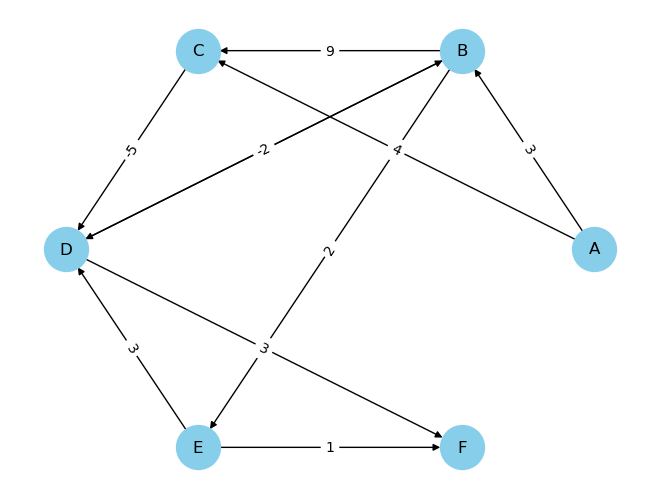

In [22]:
# Création du graphe
G = nx.DiGraph()
G.add_weighted_edges_from([
    ('A', 'B', 3), ('A', 'C', 4),
    ('B', 'C', 9), ('B', 'D', 2), ('B', 'E', 2),
    ('C', 'D', -5), ('D', 'B', -2),
    ('D', 'F', 3), ('E', 'D', 3), ('E', 'F', 1)
])
# Dessin du graphe avec les poids des arêtes
pos = nx.circular_layout(G)  # Positionnement des nœuds
labels = nx.get_edge_attributes(G, 'weight')  # Récupération des poids des arêtes
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue")  # Dessin des nœuds
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)  # Dessin des poids des arêtes
plt.show()


In [23]:
# Sommet de départ
debut = 'A'

# Calcul des plus courts chemins
resultats = bellman_ford(G, debut)

# Affichage des résultats
print("Distances les plus courtes et chemins les plus courts:")
for destination, resultat in resultats.items():
    chemin_str = ' -> '.join(resultat['chemin'])
    print(f"Chemin vers {destination}: {chemin_str}, distance = {resultat['distance']}")

Distances les plus courtes et chemins les plus courts:
Chemin vers B: A -> C -> D -> B, distance = -3
Chemin vers C: A -> C, distance = 4
Chemin vers D: A -> C -> D, distance = -1
Chemin vers E: A -> C -> D -> B -> E, distance = -1
Chemin vers F: A -> C -> D -> B -> E -> F, distance = 0


## Problème Réel de Plus Court Chemin : 

### Définir le Graphe:

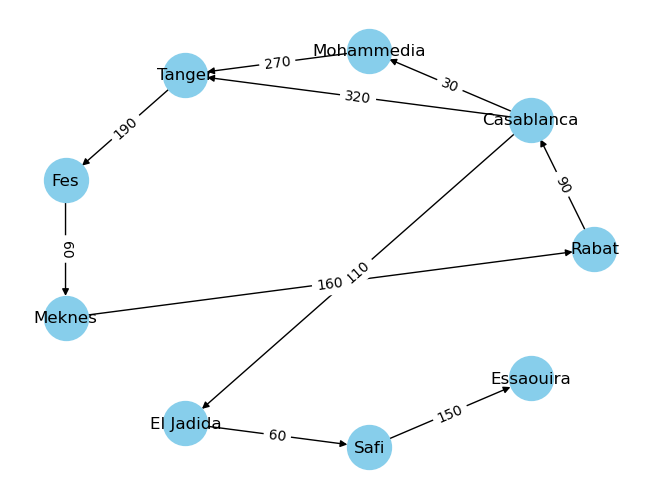

In [35]:

G = nx.DiGraph()
G.add_weighted_edges_from([
    ('Rabat', 'Casablanca', 90),
    ('Casablanca', 'Mohammedia', 30),
    ('Casablanca', 'Tanger', 320),
    ('Mohammedia', 'Tanger', 270),
    ('Tanger', 'Fes', 190),
    ('Fes', 'Meknes', 60),
    ('Meknes', 'Rabat', 160),
    ('Casablanca', 'El Jadida', 110),
    ('El Jadida', 'Safi', 60),
    ('Safi', 'Essaouira', 150)
])
# Dessin du graphe avec les poids des arêtes
pos = nx.circular_layout(G)  # Positionnement des nœuds
labels = nx.get_edge_attributes(G, 'weight')  # Récupération des poids des arêtes
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue")  # Dessin des nœuds
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)  # Dessin des poids des arêtes
plt.show()


### Résolution avec Dijkstra:

In [36]:
# Sommet de départ
depart = 'Mohammedia'

# Utilisation de l'algorithme de Dijkstra pour trouver les distances les plus courtes et les chemins les plus courts
distances, chemins_plus_courts = dijkstra(G, depart)

# Affichage des résultats
print("Distances les plus courtes et chemins les plus courts:")
for sommet in distances:
    print(f"Chemin vers {sommet} : {' -> '.join(chemins_plus_courts[sommet])}, distance = {distances[sommet]}")

Distances les plus courtes et chemins les plus courts:
Chemin vers Rabat : Mohammedia -> Tanger -> Fes -> Meknes -> Rabat, distance = 680
Chemin vers Casablanca : Mohammedia -> Tanger -> Fes -> Meknes -> Rabat -> Casablanca, distance = 770
Chemin vers Mohammedia : Mohammedia, distance = 0
Chemin vers Tanger : Mohammedia -> Tanger, distance = 270
Chemin vers Fes : Mohammedia -> Tanger -> Fes, distance = 460
Chemin vers Meknes : Mohammedia -> Tanger -> Fes -> Meknes, distance = 520
Chemin vers El Jadida : Mohammedia -> Tanger -> Fes -> Meknes -> Rabat -> Casablanca -> El Jadida, distance = 880
Chemin vers Safi : Mohammedia -> Tanger -> Fes -> Meknes -> Rabat -> Casablanca -> El Jadida -> Safi, distance = 940
Chemin vers Essaouira : Mohammedia -> Tanger -> Fes -> Meknes -> Rabat -> Casablanca -> El Jadida -> Safi -> Essaouira, distance = 1090


### Résolution avec Bellman-Ford:

In [38]:
# Sommet de départ
debut = 'Mohammedia'

# Calcul des plus courts chemins
resultats = bellman_ford(G, debut)

# Affichage des résultats
print("Distances les plus courtes et chemins les plus courts:")
for destination, resultat in resultats.items():
    chemin_str = ' -> '.join(resultat['chemin'])
    print(f"Chemin vers {destination}: {chemin_str}, distance = {resultat['distance']}")

Distances les plus courtes et chemins les plus courts:
Chemin vers Rabat: Mohammedia -> Tanger -> Fes -> Meknes -> Rabat, distance = 680
Chemin vers Casablanca: Mohammedia -> Tanger -> Fes -> Meknes -> Rabat -> Casablanca, distance = 770
Chemin vers Tanger: Mohammedia -> Tanger, distance = 270
Chemin vers Fes: Mohammedia -> Tanger -> Fes, distance = 460
Chemin vers Meknes: Mohammedia -> Tanger -> Fes -> Meknes, distance = 520
Chemin vers El Jadida: Mohammedia -> Tanger -> Fes -> Meknes -> Rabat -> Casablanca -> El Jadida, distance = 880
Chemin vers Safi: Mohammedia -> Tanger -> Fes -> Meknes -> Rabat -> Casablanca -> El Jadida -> Safi, distance = 940
Chemin vers Essaouira: Mohammedia -> Tanger -> Fes -> Meknes -> Rabat -> Casablanca -> El Jadida -> Safi -> Essaouira, distance = 1090
